# SLU14 - k-Nearest Neighbours (kNN)

In this notebook we will be covering the following:

- k-Nearest Neighbours Algorithm
- A Primer on Distance
- Some considerations about kNN
- Using kNN


## 1. k-Nearest Neighbours Algorithm

k-Nearest Neighbours (or kNN) is a supervised learning algorithm, that can be used both for classification and regression.

Its main advantages are that it is very simple to understand and implement (as you'll see here!) and that it can be used in a wide range of problems.

Its main disadvantages are that it doesn't scale very well to large datasets and to high dimensional spaces (without some optimisations).

### 1.1 How does it work

The principle behind k-nearest neighbour methods is to find a predefined number of training samples closest to the point we want to find a prediction for, and predict the label from these. The predifined number of samples is a user-defined constant `k`.

The assumption here is that if two points are similar, i.e, close together in the features space, then their labels should also be similar.

We'll be more careful in the definition of similarity, but let's first begin with one example on how can we use kNN for classification and another for regression.

![pic](media/knn.png)

In the **Classification with kNN** figure, we can see how kNN can be used for classification.

We have a point for which we want to predict a class, in this case it's the yellow star. We start by finding the _k_ points in the training data that are the closest to the star: these are the k-nearest neighbours. Then, we select as the predicted class for the star, the most common class among the k-nearest neighbours.

In this example above, if we use _k = 3_, the star's nearest neighbours are the two red circles and the blue square that are inside the smallest dashed circle. The most common class among the nearest neighbours is class B (red circles), so that is the class that we'll predict for the star.

Can you figure out what would be the predicted class if we used _k = 7_?

In the **Regression with kNN** figure, we can see how kNN can be used for regression.

We have a point for which we know the x-value want to predict the y-value (which is the star!). Again we need to find the k-nearest neighbours, and then, select as the predicted value, the average y-value of the k-nearest neighbours.

In this example above, we know the star's x-value, which is 8, and we want to predict its y-value.
If we use _k = 3_, the star's nearest neighbours (measured in the x-axis) are the three points within the shaded area. 
To get the predicted y-value for the star, we average the y-values of the nearest neighbours:

$$\frac{2+4+5}{3} = 3.67$$

Can you figure out what would be the predicted y-value for the star if we used _k = 5_?

## 2. A Primer on Distance

As we mentioned before, in order to find the k-nearest neighbours of a point, we need to have a measure of similarity, in order to actually understand how "near" two points are.

The most common way to handle this is to use a **distance function**, that gives us a numerical measurement of how far apart two points are. Once we have such a function, we can select the nearest neighbours of a certain point by finding the neighbours for which the distance is the smallest.

In most of the cases, using a distance function to measure distances between data points requires all the features in a dataset to be numerical. So, in case you have any categorical variables, you will need to represent them as numbers (or drop them!), before measuring distances in your dataset.

Let's see some examples.

### 2.1 Euclidean distance

Remeber when you were in high school and had to compute vector norms and distances between vectors? Cool, because you were using the Euclidean distance back then!

Let's define it.

**The one dimensional case**

In the one dimensional case, we have two one-dimensional points $p$ and $q$.

$$d(p, q) = \sqrt{(q - p)^2} = |q - p|$$

**The two dimensional case**

In the two dimensional case, we have two two-dimensional points or vectors $\mathbf{p}$ and $\mathbf{q}$.

$$d(\mathbf{p}, \mathbf{q}) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}$$

**The n dimensional case**

In the n dimensional case, we have two n-dimensional points or vectors $\mathbf{p}$ and $\mathbf{q}$.

$$d(\mathbf{p}, \mathbf{q}) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_n - p_n)^2} = \sqrt{ \sum_{i=1}^n (q_i - p_i)^2}$$

The euclidean distance is a good choice when the features are more or less in the same range of values. Can you figure out why this is the case?

### 2.2 Dot product (*)

The dot product between two n-dimensional vectors $\mathbf{u}$ and $\mathbf{v}$ is defined as

$$\mathbf{u} \; .  \mathbf{v} = \sum_{i=1}^n u_i v_i = u_1v_1 + u_2v_2 + ... + u_nv_n$$

Given the angle formed by the two vectors, $\theta$, and the norms of the vectors $|.|$, we can also define the dot product between $\mathbf{u}$ and $\mathbf{v}$ as

$$\mathbf{u} \; .  \mathbf{v} = |\mathbf{u}| \; |\mathbf{v}| \; cos(\theta)$$

In fact, this second definition makes it easier to understand how the dot product can be used as a distance.
The dot product measures the projection of one vector onto the other, which basically means that we're measuring the vectors' norms and how much the two vectors are pointing in the same direction.

Let's use the following image and consider some particular cases to get a better intuition on this.

![pic](media/dot_product.png)

This image shows a representation of the dot product between vectors $\mathbf{u}$ and $\mathbf{v}$.
Consider the following cases:

* $\theta = 0$:
In this case, $cos(\theta) = 1 $, which means the two vectors are collinear. This is when $\mathbf{u} \; .  \mathbf{v} = |\mathbf{u}| \; |\mathbf{v}|$ has the maximum value.


* $0 < \theta < \frac{\pi}{2}$:
In this case, $0 < cos(\theta) < 1$, meaning that $|\mathbf{u}| \; |\mathbf{v}|$ is multiplied by a number between 0 and 1, and it gets smaller. The wider the angle (or difference in direction) between the two vectors, the smaller the dot product gets.


* $\theta = \frac{\pi}{2}$:
In this case, $cos(\theta) = 0$, which means the two vectors are orthogonal. This is when $\mathbf{u} \; .  \mathbf{v} = 0$.


* $\frac{\pi}{2} < \theta < \pi $:
In this case, $-1 < cos(\theta) < 0$, meaning that $|\mathbf{u}| \; |\mathbf{v}|$ is multiplied by a number between -1 and 0, and it gets smaller in absolute value, and negative. This means that the two vectors have started to point in very different directions. Again, the wider the angle between the two vectors, the smaller the dot product gets.


* $\theta = \pi$:
In this case, $cos(\theta) = -1$, which means the two vectors are parallel, but pointing in opposite directions. This is when $\mathbf{u} \; .  \mathbf{v} = -|\mathbf{u}| \; |\mathbf{v}|$ has the minimum value.

### 2.3 Cosine distance (*)

As we saw above, there is a relationship between the dot product and the cosine of two vectors:

$$cos(\theta) = \frac{\mathbf{u} \; . \mathbf{v}}{|\mathbf{u}| \; |\mathbf{v}|}$$

With the cosine, we are measuring how similar is the direction of the two vectors, and disregarding the vectors' norms.

Now we just need to convert this similarity into a distance. Since the domain of the cosine function is $[-1, 1]$, we can do this in the following way:

$$cos\_dist(\mathbf{u}, \mathbf{v}) = 1 - cos(\mathbf{u}, \mathbf{v})$$

The cosine distance works very well in cases where the features have values in different ranges. This is because dividing the dot product by the norms of the vectors works as a kind of normalisation!

**(*) Note for the math nerds**

Neither the dot product not the cosine are distances, as per the mathematical definition of a [distance function](https://en.wikipedia.org/wiki/Distance#General_metric). Because of that, we cannot use some of scikit's optimisations that make kNN run faster. But that is a bit out of scope here!

## 3. Some considerations about kNN

Now that we have some intuition on how kNN works, and we've seen some functions that can be used as a distance (i.e, a measure of similarity), let's go through some considerations about this algorithm.


### Non-parametric

kNN is a non-parametric model because its structure is not specified a priori but is instead determined from the data.

To better understand what this means, we can think of a counter example: Linear Regression, which is a parametric model, assumes that the data follows a linear distribution.


### No learning

When we described how does kNN work, you may have noticed a key difference between this algorithm and other algorithms that you've seen before, like Linear Regression or Logistic Regression: in kNN we don't actually learn anything!

Taking Linear Regression as an example, in the traning phase, we used training data to learn some parameters ($\theta$) that were later used in the prediction phase to make predictions on unseen data.

In kNN we don't learn any parameters, and in the training phase we don´t do more than just loading the training dataset into memory. Instead, most of the action takes place at prediction time, when we determine the nearest neighbours (using training data), and make predictions based on them. This is why we say that kNN is a **lazy** method.


### How to chose the value of _k_

The optimal choice of the value *k* is highly data-dependent: in general a larger _k_ suppresses the effects of noise, but making it too large results in more prediction errors.

In `SLU18 - Hyperparameter Tuning`, we'll learn how to systematically find the best value for _k_.


### kNN and high dimensional spaces

When we increase the number of features in our model, we need more dimensions to represent the data points.

The problem with high dimensional spaces is that the data gets very sparse, and consequently, points tend not to be close to each other. In particular, the k-nearest neighbours of a point won't be much closer to it than any other random points, which breaks the algorithm's assumption that points that are close are also similar.

This phenomenon, called **curse of dimensionality**, is very well explained with an example [here](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html).

This problem exists when we use the euclidean distance and the dot product, as these two distances measure amplitudes.
The same doesn't happen with the cosine distance, that just considers directions.

Another way to avoid this is to use dimensionality reduction techinques, in order to simplify our data. This won't be covered in this course.


### kNN and large datasets

Given a dataset with _N_ training points, when we try to get a prediction for a certain point, we need to load the entire dataset into memory and compute the distance between this point and all the other points.

This means that the time that it takes to yield a prediction, depends on the dataset size. In fact, it grows linearly with it!

Given these considerations, it's easy to understand that kNN is not the best choice when the dataset is very large.

There are some ways to make kNN run faster, but these are out of the scope of this SLU!

## 4. Using kNN

Let's now see how can we use kNN in classification and regression problems.

Let's start with the usual imports.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

### 4.1 Classification on the iris dataset

We'll use kNN to solve the iris classification problem.

The [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a well known dataset for classification.

In the dataset, each row (or observation) represents an iris flower. The features that describe the flower are _sepal length_, _sepal width_, _petal length_ and _petal width_.

The goal is to predict the iris' type, that can be one of _setosa_, _versicolor_ and _virginica_.

![iris](media/iris.png)

Here we're doing a bunch of imports:

* scikit's datasets: this is a package that allows up to load the iris dataset
* accuracy score: this is to evaluate our classification model
* train_test_split: this is to split out dataset into training and testing sets
* **KNeighborsClassifier**: this is our kNN classifier

In [2]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

We'll start by loading the iris dataset and then split the dataset into training and testing.

In [3]:
# Loading the iris dataset
iris = datasets.load_iris()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)
print(f"Train data size: {len(X_train)}\nTest data size: {len(X_test)}")

Train data size: 100
Test data size: 50


We'll create a DataFrame with the features and target in the training set, just to quickly check their values and check their ranges with a boxplot.

In [4]:
df_train = pd.DataFrame(X_train, columns=iris['feature_names'])
df_train['target'] = y_train
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.7,2.9,4.2,1.3,1
1,7.6,3.0,6.6,2.1,2
2,5.6,3.0,4.5,1.5,1
3,5.1,3.5,1.4,0.2,0
4,7.7,2.8,6.7,2.0,2


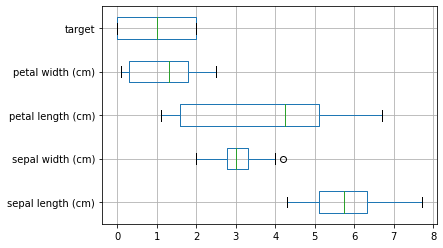

In [5]:
df_train.boxplot(vert=False);

Now, our goal is to predict labels for the data points in the testing set.

First, let's get a baseline, which is the accuracy of the simplest model we can think of. Our model must be better than that!

The simplest model is to always predict the most frequent class. So let's see how to do that.

In [6]:
test_size = len(y_test)
most_common_target = df_train.target.value_counts(sort=True).index[0]

y_pred = np.ones(test_size) * most_common_target
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
accuracy_score(y_test, y_pred)

0.3

So, we need to improve upon a 0.3 accuracy score. Let's see if we can do it with our kNN classifier.

For each point in the testing set, kNN will search for the k nearest neighbours in the training set, and predict the most frequent label among the the neighbours.

For now let's use the default value for k, which is 5.

In [8]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.98

0.98 accuracy! That's way better than our baseline. kNN did a good job :)

### 4.2 Regression on the diabetes dataset

For the example with regression, we'll use the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset).

Each data point represents one person who has diabetes. The features have information like the person's age, sex, body mass index, and other health metrics. The target is a quantitative measure of disease progression one year after a certain baseline.

Our goal is to predict this quantitative measure for unseen data.

We'll start with some additional imports:

* **KNeighborsRegressor**: this is our kNN regression model
* mean_squared_error: this is to evaluate our model
* scipy's cosine: this is for us to try the cosine distance in the kNN algorithm

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cosine as cos_dist

As we did before, we'll load the dataset from scikit's datasets and then, do a train and test split.

In [10]:
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.33, random_state=42)
print(f"Train data size: {len(X_train)}\nTest data size: {len(X_test)}")

Train data size: 296
Test data size: 146


Here we're loading the features into a DataFrame in order to quickly visualise them with the help of a boxplot.

In [11]:
df_X_train = pd.DataFrame(X_train, columns=diabetes['feature_names'])
df_X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.009016,-0.044642,-0.030996,0.021872,0.008063,0.008707,0.004460,-0.002592,0.009436,0.011349
1,-0.001882,-0.044642,0.054152,-0.066495,0.072732,0.056619,-0.043401,0.084863,0.084495,0.048628
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633
3,0.038076,0.050680,-0.009439,0.002363,0.001183,0.037517,-0.054446,0.050176,-0.025952,0.106617
4,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007837,0.023775


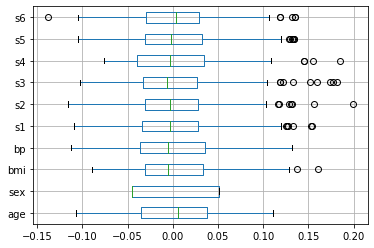

In [12]:
df_X_train.boxplot(vert=False);

Again, let's get a baseline. In this case, we'll always predict the mean value of the targets in the training set.

We'll be using the mean_squared_error to evaluate our model.

In [13]:
# baseline with predicting the average
y_pred = np.ones(len(y_test)) * y_train.mean()
mean_squared_error(y_test, y_pred)

5755.467149460409

Now let's get the predictions using the kNN regressor. We'll use k=5, which is the default value, as a starting point.

In [14]:
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

3224.3695890410954

This was a big improvement upon our baseline! Let's see if we can still do better, by chosing a different value for k.

We'll learn how to do hyperparameter tuning properly in a later SLU, but for now let's go with this method.

Plotting values of k vs the mean squared error will show us how does the error change with k. Then, we can select the value of k that minimises the error.

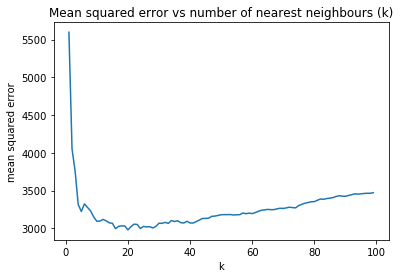

In [15]:
# this list will save the different values for k and mean squared error
k_rmse = []

# for each value of k between 1 and 100, we'll compute the mean squared error
# and save it in the k_rmse list like [(k1, error1), (k2, error2), ..., (k100, error100)]
for k in range(1, 100):
    reg = KNeighborsRegressor(k)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    k_rmse.append((k, mean_squared_error(y_test, y_pred)))

# here we're separating the k values from the error values into two lists
k_values, rmse_values = zip(*k_rmse)

# and here we're plotting k vs the error
plt.plot(k_values, rmse_values)
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.title('Mean squared error vs number of nearest neighbours (k)');

We can see that at first, the value of the error decreases a lot by adding more neighbours, and then we reach a point, around k=20, where by adding more neighbours we actually make the error worse!

So let's stick to `k=20` and see what's our mean squared error.

In [16]:
reg = KNeighborsRegressor(n_neighbors=20)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

2979.621421232877

We still managed to improve a bit from our first attempt with k=5.

Let's finish by checking how can we use the cosine distance instead of the euclidean distance (which is the default in scikit).

In [17]:
reg = KNeighborsRegressor(metric=cos_dist)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

2864.440273972603

The mean squared error decreases slightly, but not significantly.
As we saw before, the cosine distance tends to work better than the euclidean distance when we have a lot of features (because of the curse of dimensionality) or when the features are within very different ranges.

Neither of these two situations verifies here, so there is no great benefit in using the cosine distance.

In fact, using the cosine distance is probably worse, as we'll not benefit from scikit's built in optimisations for kNN. If you try to find the best k in this scenario, using the method that we used above, you'll see that it will run much slower than with the euclidean distance.